# Лабораторная работа №1. Линейная регрессия и факторный анализ

## 1. Введение

**Цель работы:** изучение основ линейной регрессии, построение простейших моделей регрессии, проведение обучения модели на реальных данных и оценка её качества.

**Постановка задачи:**

Провести обучение модели линейной регрессии на датасете с Kaggle:
1. Загрузить датасет из репозитория (например, kaggle.com или аналогичных платформ).
2. Подготовить данные: провести первичный анализ, визуализировать распределение признаков и целевой переменной. 
3. Провести предобработку данных: удалить пропущенные значения, закодировать категориальные переменные (опционально).
4. Построить матрицу корреляций. Сделать выводы о наличии мультиколлинеарности (расчет VIF-коэффициента).
5. Построить регрессионные модели (линейная и гребневая). Если целевая переменная - категориальная, то исследовать логистическую регрессию. Разделить на тренировочную и тестовую выборки (80/20 или 70/30). Использовать кросс-валидацию. Оценить качество построенной модели с помощью метрик: RMSE (Root Mean Square Error), R² (коэффициент детерминации) и MAPE (Mean Absolute Percentage Error).
6. Устранить мультиколлинеарность и снизить размерность признаков с помощью метода главных компонент (PCA). Перед проведением PCA провести стандартизацию данных.
7. Повторить шаг 5 (линейная и гребневая регрессия), но использовать в качестве признаков не исходные данные, а главные компоненты. Сравнить метрики качества (RMSE, R² и MAPE) моделей, обученных на исходных данных и на главных компонентах.

## 2. Описание датасета

**Описание:**
Red Wine Quality — Этот датасет содержит записи о качественных характеристиках красного вина португальского сорта Vinho Verde. Данные были собраны в ходе химического анализа и дегустации, чтобы построить модель, предсказывающую качество вина на основе его физико-химических свойств.

Цель датасета — предсказать качество вина (от 0 до 10) по 11 входным признакам, основанным на лабораторных измерениях. Качество оценивалось экспертами-дегустаторами на основе среднего значения нескольких оценок (от 1 — очень плохо до 10 — отличное).

**Переменные:**

1. fixed acidity - Нерастворимые кислоты. Большинство кислот, содержащихся в вине, либо фиксированные, либо нелетучие (трудно испаряются).

2. volatile acidity - Летучие кислоты. Количество уксусной кислоты в вине, слишком высокие уровни которой могут привести к неприятному уксусному привкусу.

3. citric acid - Лимонная кислота. Содержание в небольших количествах может придать винам «свежесть» и аромат.

4. residual sugar - Остаточный сахар. Количество сахара, остающееся после остановки брожения, редко можно встретить вина с содержанием сахара менее 1 грамма на литр, а вина с содержанием сахара более 45 граммов на литр считаются сладкими.

5. chlorides - Содержание хлоридов. Количество соли в вине.

6. free sulfur dioxide - Свободный диоксид серы. Свободная форма SO2 существует в равновесии между молекулярным SO2 (в виде растворенного газа) и ионом бисульфита. Она предотвращает рост микробов и окисление вина.

7. total sulfur dioxide - Общий диоксид серы. Количество свободных и связанных форм SO2. В низких концентрациях SO2 в вине практически не обнаруживается, но при концентрации свободного SO2 более 50 ppm SO2 становится ощутимым в аромате и вкусе вина.

8. density - Плотность вина . Плотность воды близка к плотности воды в зависимости от процентного содержания алкоголя и сахара.

9. pH - Уровень кислотности. Описывает, насколько кислотным или щелочным является вино по шкале от 0 (очень кислотное) до 14 (очень щелочное). Большинство вин имеют pH в диапазоне от 3 до 4 по шкале.

10. sulphates - Сульфаты. Добавка к вину, которая может способствовать повышению уровня диоксида серы (S02), действующая как антимикробное и антиоксидантное средство.

11. alcohol - Процент содержания спирта в вине.

**Целевая переменная:**

1. quality - Качество. Оценка от 0 до 10.

In [4]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")
file_path = os.path.join(path, "winequality-red.csv")
df = pd.read_csv(file_path)

print(df.head())
df.info()

c:\Users\Anastasia\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Первичный анализ fixed acidity


Количество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

Дополнение
Центральные тенденции
Мода: 7.20
Форма распределения
Асимметричность: 0.982
Эксцесс: 1.125

Оптимальное количество интервалов по правилу Стёрджеса: 12


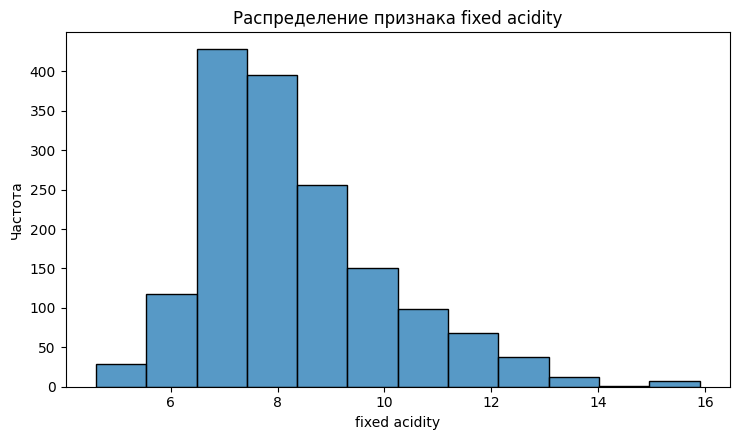

In [5]:
from scipy.stats import skew, kurtosis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fixacid = df['fixed acidity']
print(f"\nКоличество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум")
print(fixacid.describe())
print(f"\nДополнение")
print(f"Центральные тенденции")
print(f"Мода: {fixacid.mode()[0]:.2f}")
print(f"Форма распределения")
print(f"Асимметричность: {skew(fixacid):.3f}")
print(f"Эксцесс: {kurtosis(fixacid):.3f}")
n = len(df)
bins = int(np.ceil(np.log2(n) + 1))
print(f"\nОптимальное количество интервалов по правилу Стёрджеса: {bins}")

plt.figure(figsize=(7.5, 4.5))
sns.histplot(fixacid, bins=12)
plt.title('Распределение признака fixed acidity')
plt.xlabel('fixed acidity')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Среднее = 8.32, Медиана = 7.9, Мода = 7.2. Ассиметричность = 0.982. Эксцесс = 1.125.

**Вывод:** Среднее значение (8.32) > Медиана (7.9) > Мода (7.2) - классический признак **правосторонней положительной** асимметрии распределения, где хвост распределения тянется вправо, и есть выбросы или редкие высокие значения, которые "тянут" среднее вверх. Ассиметричность (0.982) близко к 1, что указывает на выраженную **правостороннюю** асимметрию. Положительный эксцесс (1.125) говорит о том, что распределение **островершинное**. По сравнению с нормальным распределением более выраженный пик вокруг моды (7.2) и тяжелые хвосты — вероятность экстремальных значений (очень высокой или очень низкой кислотности) выше, чем в нормальном распределении.



### Первичный анализ volatile acidity


Количество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

Дополнение
Центральные тенденции:
Мода: 0.60
Форма распределения:
Асимметричность: 0.671
Эксцесс: 1.218


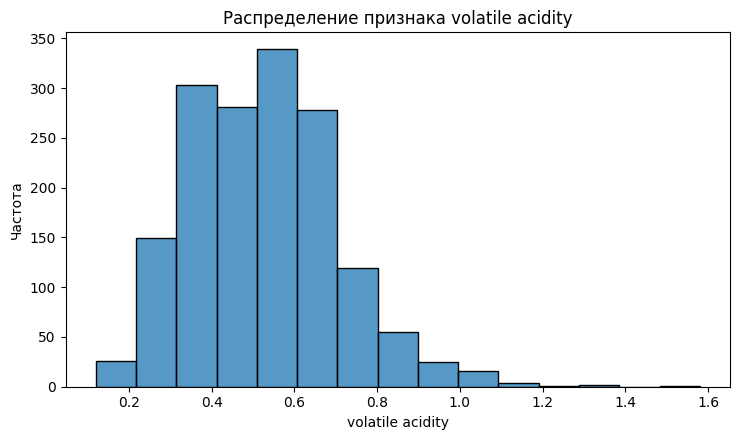

In [6]:
volacid = df['volatile acidity']
print(f"\nКоличество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум")
print(volacid.describe())
print(f"\nДополнение")
print(f"Центральные тенденции:")
print(f"Мода: {volacid.mode()[0]:.2f}")
print(f"Форма распределения:")
print(f"Асимметричность: {skew(volacid):.3f}")
print(f"Эксцесс: {kurtosis(volacid):.3f}")

plt.figure(figsize=(7.5, 4.5))
sns.histplot(volacid, bins=15)
plt.title('Распределение признака volatile acidity')
plt.xlabel('volatile acidity')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Среднее = 0.527, Медиана = 0.52, Мода = 0.6. Ассиметричность = 0.671. Эксцесс = 1.218.

**Вывод:** Значения среднего (0.527) и медианы (0.52) практически совпадают, в то время как мода (0.6). Положительное значение ассиметричности (0.671) подтверждает **правостороннюю** асимметрию. Распределение имеет длинный хвост вправо — есть вина с необычно высокой летучей кислотностью. Положительный эксцесс указывает на **островершинное** распределение с тяжёлыми хвостами. Больше значений сконцентрировано вокруг центра (в районе 0.5–0.6), но при этом чаще встречаются экстремальные значения (очень низкая или очень высокая летучая кислотность), чем в нормальном распределении.

### Первичный анализ citric acid


Количество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум
count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

Дополнение
Центральные тенденции:
Мода: 0.00
Форма распределения:
Асимметричность: 0.318
Эксцесс: -0.790


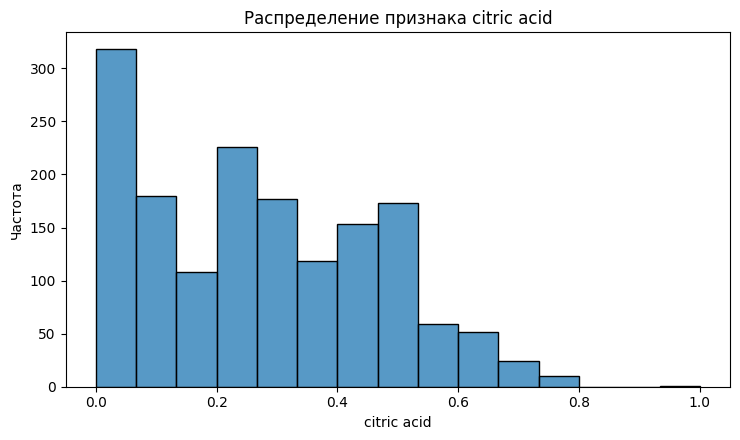

In [7]:
citacid = df['citric acid']
print(f"\nКоличество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум")
print(citacid.describe())
print(f"\nДополнение")
print(f"Центральные тенденции:")
print(f"Мода: {citacid.mode()[0]:.2f}")
print(f"Форма распределения:")
print(f"Асимметричность: {skew(citacid):.3f}")
print(f"Эксцесс: {kurtosis(citacid):.3f}")

plt.figure(figsize=(7.5, 4.5))
sns.histplot(citacid, bins=15)
plt.title('Распределение признака citric acid')
plt.xlabel('citric acid')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Среднее = 0.271, Медиана = 0.26, Мода = 0.00. Ассиметричность = 0.318. Эксцесс = -0.790.

**Вывод:** Среднее (0.271) > Медиана (0.26) > Мода (0.00). Это указывает на **правостороннюю** асимметрию. Мода равна 0.00 — то есть наиболее часто встречающееся значение — полное отсутствие лимонной кислоты. Положительное значение говорит о **правосторонней** асимметрии. Распределение немного "тянется" вправо, то есть есть немного вин с повышенным содержанием лимонной кислоты, но таких значений немного. Отрицательный эксцесс (-0.790) говорит о том, что распределение **плосковершинное**. Менее выраженный пик вокруг центра, более равномерное распределение значений, лёгкие хвосты — экстремальные значения (очень высокая или очень низкая лимонная кислота) встречаются реже, чем в нормальном распределении.

### Первичный анализ residual sugar


Количество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум
count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

Дополнение
Центральные тенденции:
Мода: 2.00
Форма распределения:
Асимметричность: 4.536
Эксцесс: 28.524


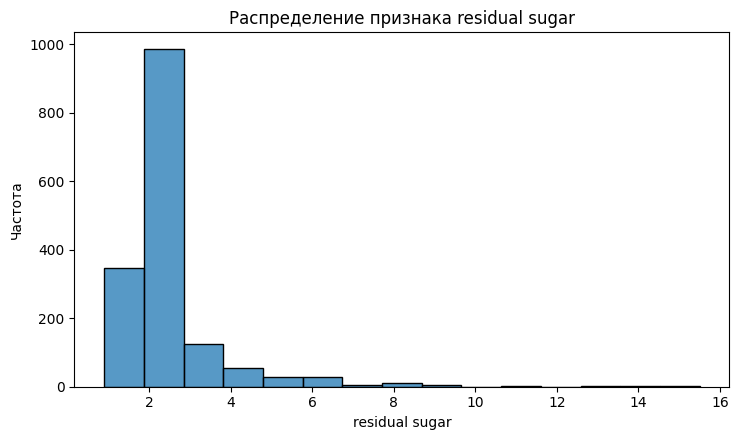

In [8]:
sugar = df['residual sugar']
print(f"\nКоличество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум")
print(sugar.describe())
print(f"\nДополнение")
print(f"Центральные тенденции:")
print(f"Мода: {sugar.mode()[0]:.2f}")
print(f"Форма распределения:")
print(f"Асимметричность: {skew(sugar):.3f}")
print(f"Эксцесс: {kurtosis(sugar):.3f}")

plt.figure(figsize=(7.5, 4.5))
sns.histplot(sugar, bins=15)
plt.title('Распределение признака residual sugar')
plt.xlabel('residual sugar')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Среднее = 2.54, Медиана = 2.2, Мода = 2.00. Ассиметричность = 4.536. Эксцесс = 28.524.

**Вывод:** Среднее (2.54) > Медиана (2.2) > Мода (2.00). Это указывает на **правостороннюю** асимметрию. Асимметрия (4.536) имеет крайне высокое значение. Распределение сильно искажено вправо, подавляющее большинство вин — сухие (низкий остаточный сахар), но есть редкие, но очень сладкие вина, которые "тянут" среднее вверх. Эксцесс (28.524) является огромным значением. Распределение **крайне островершинное** с чрезвычайно тяжёлыми хвостами. Практически все значения сконцентрированы в узком диапазоне (около 2 г/дм³), но при этом присутствуют экстремальные выбросы (вины с очень высоким сахаром).

### Первичный анализ chlorides


Количество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум
count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

Дополнение
Центральные тенденции:
Мода: 0.08
Форма распределения:
Асимметричность: 5.675
Эксцесс: 41.582


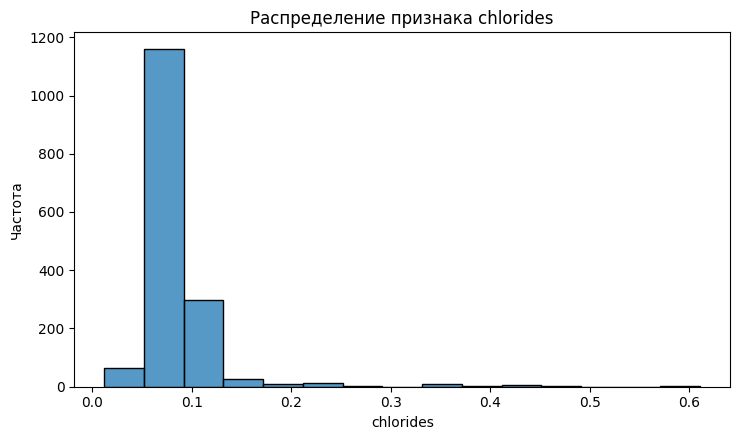

In [9]:
chlorides = df['chlorides']
print(f"\nКоличество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум")
print(chlorides.describe())
print(f"\nДополнение")
print(f"Центральные тенденции:")
print(f"Мода: {chlorides.mode()[0]:.2f}")
print(f"Форма распределения:")
print(f"Асимметричность: {skew(chlorides):.3f}")
print(f"Эксцесс: {kurtosis(chlorides):.3f}")

plt.figure(figsize=(7.5, 4.5))
sns.histplot(chlorides, bins=15)
plt.title('Распределение признака chlorides')
plt.xlabel('chlorides')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Среднее = 0.087, Медиана = 0.079, Мода = 0.08. Ассиметричность = 5.675. Эксцесс = 41.582.

**Вывод:** Мода (0.08) и медиана (0.079) почти совпадают. Среднее смещено вверх, что говорит о наличие правых выбросов. Асимметрия (5.675) имеет крайне высокое значение. Массивный правый хвост, подавляющее большинство значений сосредоточено в узком низком диапазоне, но есть редкие, очень высокие значения хлоридов, которые сильно «тянут» среднее вверх. Эксцесс (41.582)
чрезвычайно высокий показатель, означающий, что распределение **крайне островершинное**. Почти вся масса данных сжата в очень узкий интервал около моды (0.08).

### Первичный анализ free sulfur dioxide


Количество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум
count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64

Дополнение
Центральные тенденции:
Мода: 6.00
Форма распределения:
Асимметричность: 1.249
Эксцесс: 2.013


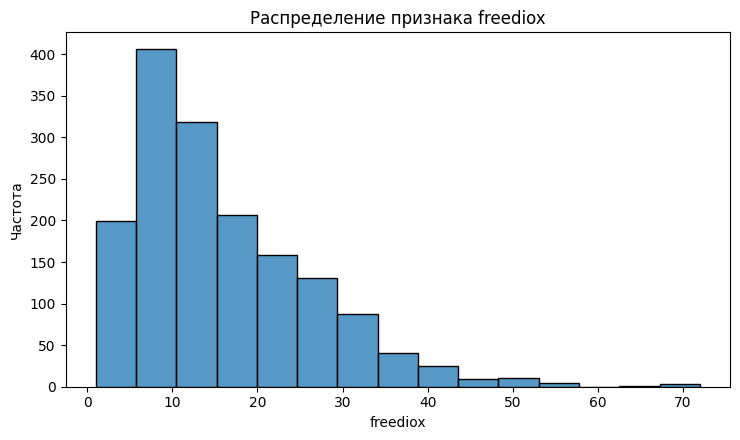

In [10]:
freediox = df['free sulfur dioxide']
print(f"\nКоличество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум")
print(freediox.describe())
print(f"\nДополнение")
print(f"Центральные тенденции:")
print(f"Мода: {freediox.mode()[0]:.2f}")
print(f"Форма распределения:")
print(f"Асимметричность: {skew(freediox):.3f}")
print(f"Эксцесс: {kurtosis(freediox):.3f}")

plt.figure(figsize=(7.5, 4.5))
sns.histplot(freediox, bins=15)
plt.title('Распределение признака freediox')
plt.xlabel('freediox')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Среднее = 15.87, Медиана = 14.00, Мода = 6.00. Ассиметричность = 1.249. Эксцесс = 2.013.

**Вывод:** Среднее (15.87) > Медиана (14.0), хвост распределения тянется вправо. Мода (6.0) значительно ниже — это говорит о том, что наиболее часто встречающееся значение сильно смещено влево по сравнению с центром распределения. Асимметрия (1.249) имеет положительное значение. Значение эксцесса (2.013) означает высокий положительный эксцесс, распределение **островершинное** с тяжёлыми хвостами, пик вокруг моды (6 мг/дм³) выраженный, но при этом чаще, чем в нормальном распределении, встречаются как очень низкие, так и очень высокие значения.

### Первичный анализ total sulfur dioxide


Количество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум
count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

Дополнение
Центральные тенденции:
Мода: 28.00
Форма распределения:
Асимметричность: 1.514
Эксцесс: 3.794


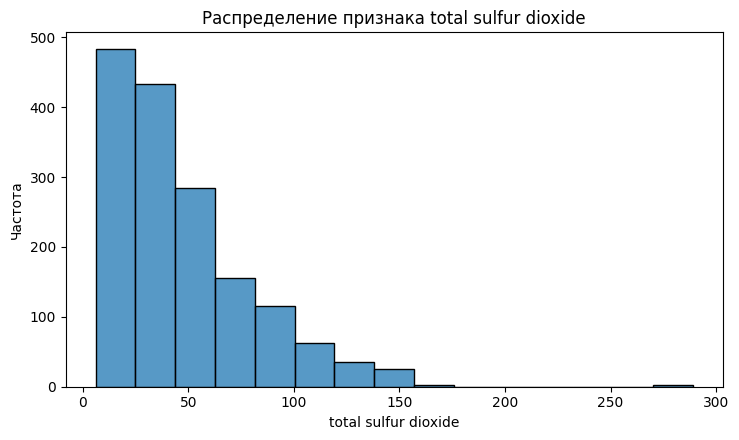

In [11]:
totaldiox = df['total sulfur dioxide']
print(f"\nКоличество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум")
print(totaldiox.describe())
print(f"\nДополнение")
print(f"Центральные тенденции:")
print(f"Мода: {totaldiox.mode()[0]:.2f}")
print(f"Форма распределения:")
print(f"Асимметричность: {skew(totaldiox):.3f}")
print(f"Эксцесс: {kurtosis(totaldiox):.3f}")

plt.figure(figsize=(7.5, 4.5))
sns.histplot(totaldiox, bins=15)
plt.title('Распределение признака total sulfur dioxide')
plt.xlabel('total sulfur dioxide')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Среднее = 46.47, Медиана = 38.00, Мода = 28.00. Ассиметричность = 1.514. Эксцесс = 3.794.

**Вывод:** Среднее (46.47) > Медиана (38.0) > Мода (28.0) — классическая картина распределения с длинным правым хвостом. Асимметрия (1.514) имеет положительное значение. Значение эксцесса (3.794), распределение крайне **островершинное**, наличие тяжёлых хвостов — то есть экстремальные значения (очень высокий или очень низкий общий SO₂) встречаются чаще, чем в нормальном распределении.

### Первичный анализ density


Количество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум
count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

Дополнение
Центральные тенденции:
Мода: 1.00
Форма распределения:
Асимметричность: 0.071
Эксцесс: 0.927


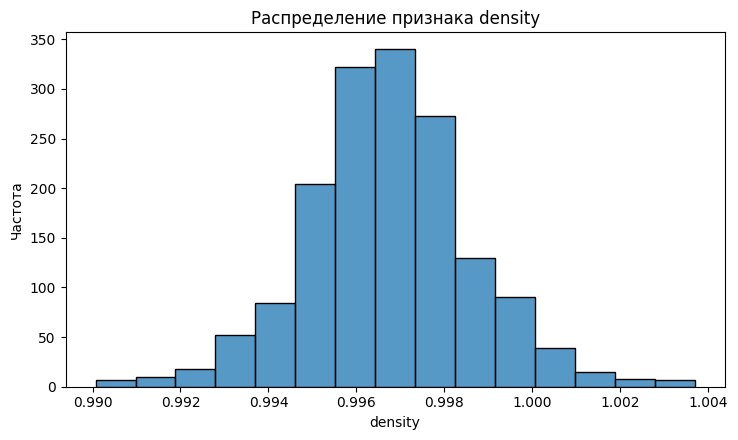

In [12]:
density = df['density']
print(f"\nКоличество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум")
print(density.describe())
print(f"\nДополнение")
print(f"Центральные тенденции:")
print(f"Мода: {density.mode()[0]:.2f}")
print(f"Форма распределения:")
print(f"Асимметричность: {skew(density):.3f}")
print(f"Эксцесс: {kurtosis(density):.3f}")

plt.figure(figsize=(7.5, 4.5))
sns.histplot(density, bins=15)
plt.title('Распределение признака density')
plt.xlabel('density')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Среднее = 1.00, Медиана = 1.00, Мода = 1.00. Ассиметричность = 0.071. Эксцесс = 0.927.

**Вывод:** Полное совпадение среднего, медианы и моды. Сильный признак симметричного распределения. Распределение близко к нормальному. Значение асимметрии (0.071) близко к нулю, что подтверждает практическую симметрию, нет выраженного хвоста, распределение уравновешено относительно центра. Значение эксцесса (0.927), распределение **умеренно островершинное**.

### Первичный анализ pH


Количество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

Дополнение
Центральные тенденции:
Мода: 3.30
Форма распределения:
Асимметричность: 0.194
Эксцесс: 0.801


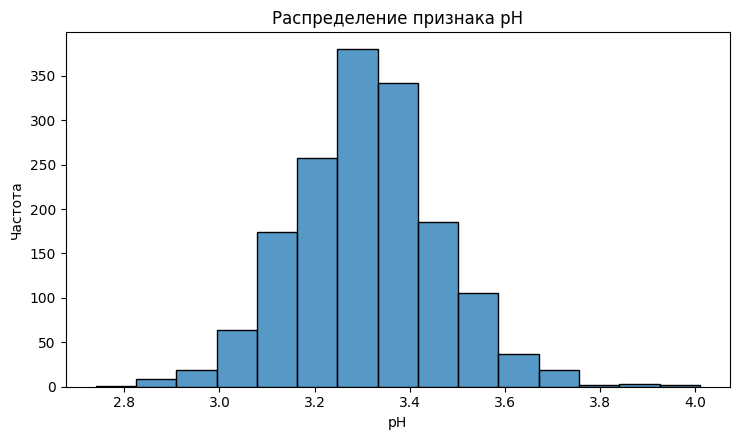

In [13]:
ph = df['pH']
print(f"\nКоличество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум")
print(ph.describe())
print(f"\nДополнение")
print(f"Центральные тенденции:")
print(f"Мода: {ph.mode()[0]:.2f}")
print(f"Форма распределения:")
print(f"Асимметричность: {skew(ph):.3f}")
print(f"Эксцесс: {kurtosis(ph):.3f}")

plt.figure(figsize=(7.5, 4.5))
sns.histplot(ph, bins=15)
plt.title('Распределение признака pH')
plt.xlabel('pH')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Среднее = 3.31, Медиана = 3.31, Мода = 3.30. Ассиметричность = 0.194. Эксцесс = 0.801.

**Вывод:** Почти полное совпадение среднего, медианы и моды. Это сильный индикатор высокой симметрии и однородности распределения. Значение асимметрии (0.194) близко к нулю, распределение практически симметричное. Значение эксцесса (0.801), распределение **умеренно островершинное**.

### Первичный анализ sulphates


Количество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум
count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

Дополнение
Центральные тенденции:
Мода: 0.60
Форма распределения:
Асимметричность: 2.426
Эксцесс: 11.680


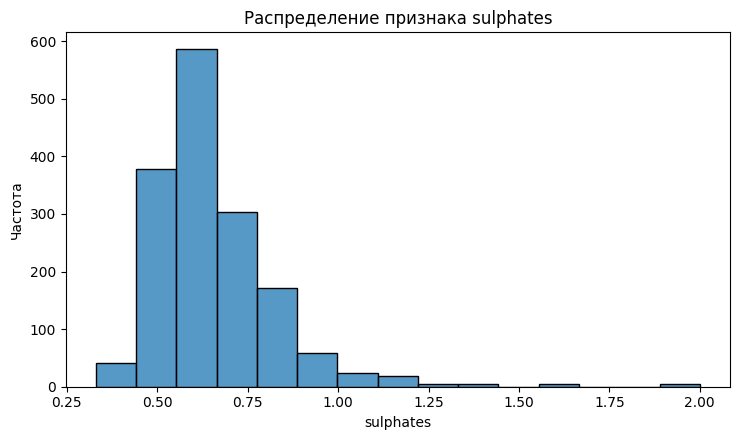

In [14]:
sulphates = df['sulphates']
print(f"\nКоличество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум")
print(sulphates.describe())
print(f"\nДополнение")
print(f"Центральные тенденции:")
print(f"Мода: {sulphates.mode()[0]:.2f}")
print(f"Форма распределения:")
print(f"Асимметричность: {skew(sulphates):.3f}")
print(f"Эксцесс: {kurtosis(sulphates):.3f}")

plt.figure(figsize=(7.5, 4.5))
sns.histplot(sulphates, bins=15)
plt.title('Распределение признака sulphates')
plt.xlabel('sulphates')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Среднее = 0.66, Медиана = 0.62, Мода = 0.60. Ассиметричность = 2.426. Эксцесс = 11.680.

**Вывод:** Среднее (0.66) > Медиана (0.62) > Мода (0.60), классический признак распределения с длинным правым хвостом. Значение асимметрии (2.426) подтверждает **правостороннюю** ассиметрию. Значение эксцесса (11.680), это говорит о **крайне островершинном** распределении, почти вся масса данных сжата в узкий диапазон около 0.60–0.65, при этом хвосты необычайно тяжёлые — присутствуют редкие, но экстремальные значения.

### Первичный анализ alcohol


Количество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

Дополнение
Центральные тенденции:
Мода: 9.50
Форма распределения:
Асимметричность: 0.860
Эксцесс: 0.196


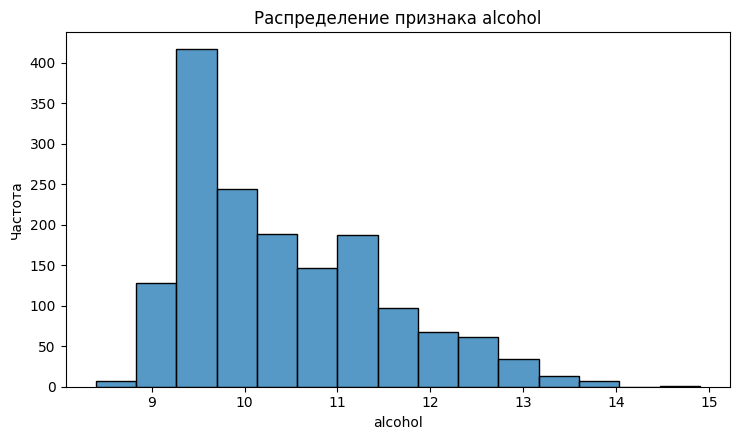

In [15]:
alcohol = df['alcohol']
print(f"\nКоличество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум")
print(alcohol.describe())
print(f"\nДополнение")
print(f"Центральные тенденции:")
print(f"Мода: {alcohol.mode()[0]:.2f}")
print(f"Форма распределения:")
print(f"Асимметричность: {skew(alcohol):.3f}")
print(f"Эксцесс: {kurtosis(alcohol):.3f}")

plt.figure(figsize=(7.5, 4.5))
sns.histplot(alcohol, bins=15)
plt.title('Распределение признака alcohol')
plt.xlabel('alcohol')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Среднее = 10.42, Медиана = 10.20, Мода = 9.50. Ассиметричность = 0.860. Эксцесс = 0.196.

**Вывод:** Среднее (10.42) > Медиана (10.20) > Мода (9.50) — ясный признак положительного перекоса. Асимметрия (0.860) выраженная, но не экстремальная. Значение эксцесса (0.196), близко к нормальному по "остроте" пика, хвосты близки к нормальным — экстремальные значения встречаются в ожидаемом количестве.

### Первичный анализ quality


Количество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Дополнение
Центральные тенденции:
Мода: 5.00
Форма распределения:
Асимметричность: 0.218
Эксцесс: 0.292


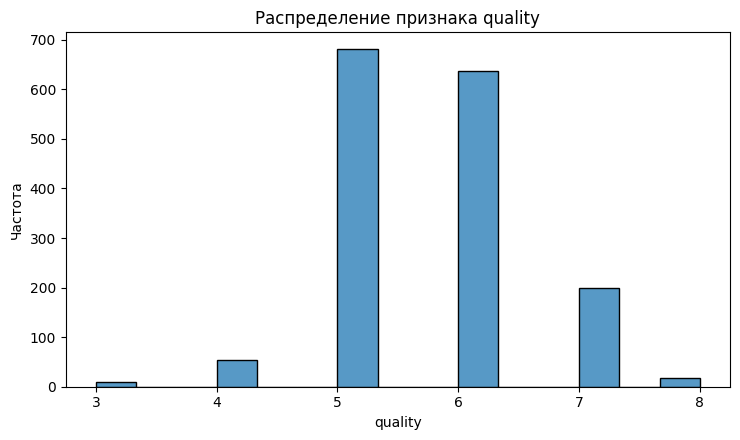

In [16]:
quality = df['quality']
print(f"\nКоличество, среднее, стандартное отклонение, минимум, первый квартиль, медиана, третий квартиль, максимум")
print(quality.describe())
print(f"\nДополнение")
print(f"Центральные тенденции:")
print(f"Мода: {quality.mode()[0]:.2f}")
print(f"Форма распределения:")
print(f"Асимметричность: {skew(quality):.3f}")
print(f"Эксцесс: {kurtosis(quality):.3f}")

plt.figure(figsize=(7.5, 4.5))
sns.histplot(quality, bins=15)
plt.title('Распределение признака quality')
plt.xlabel('quality')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Среднее = 5.64, Медиана = 6.00, Мода = 5.00. Ассиметричность = 0.218. Эксцесс = 0.292.

**Вывод:** Среднее (5.64) < Медиана (6.00), может показаться, что асимметрия отрицательная, но асимметрия (0.218), то есть **правосторонняя**. Распределение не гладкое, а "ступенчатое". Эксцесс (0.292), распределение **немного островершинное**.

### Матрица корреляций

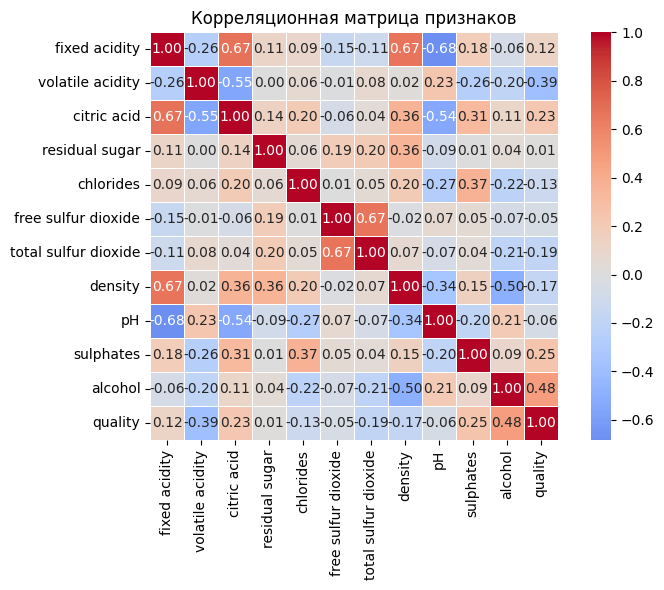

In [28]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5)
plt.title("Корреляционная матрица признаков")
plt.tight_layout()
plt.show()

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop('quality', axis=1)
vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns
)
vif_df = pd.DataFrame({'Признак': vif_series.index, 'VIF': vif_series.values})
vif_df['VIF'] = vif_df['VIF'].round(3)

print("Коэффициенты VIF для признаков:")
print(vif_df.to_string(index=False))

Коэффициенты VIF для признаков:
             Признак      VIF
       fixed acidity   74.452
    volatile acidity   17.060
         citric acid    9.183
      residual sugar    4.663
           chlorides    6.555
 free sulfur dioxide    6.443
total sulfur dioxide    6.520
             density 1479.287
                  pH 1070.968
           sulphates   21.591
             alcohol  124.395


**Вывод:** 

**Крайне высокая мультиколлинеарность (VIF > 100):** density (1479.3), pH (1071.0), alcohol (124.4). Скорее всего, плотность вычисляется через другие признаки. Плотность (density) может зависить от alcohol и residual sugar по физической формуле. Уровень кислотности (pH) сильно cвязан с нерастворимыми кислотами (fixed acidity) и лимонной кислотой (citric acid).

**Высокая мультиколлинеарность (10 ≤ VIF < 100):** fixed acidity (74.45), volatile acidity (17.06), sulphates (21.59).

**Умеренная мультиколлинеарность (5 ≤ VIF < 10):** citric acid (9.18), chlorides (6.56), free sulfur dioxide (6.44), total sulfur dioxide (6.52). Эти признаки менее проблематичны, но всё же стоит учитывать их взаимосвязь.

**Приемлемый уровень (VIF < 5):** residual sugar (4.66). Единственный признак без серьёзных проблем с мультиколлинеарностью.

## 3. Подготовка данных

In [49]:
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Пропущенные значения отсутствуют. Для оценки качества модели данные разделены на тренировочную и тестовую выборки (80/20). Число 42 взято как «универсальное» фиксированное число для воспроизводимости. Также применена стандартизация, т.к. признаки имеют разные единицы измерения и диапазоны.
Затем данные преобразуются по формуле:

- **Обучающая выборка**:  
  $$
  z_{ij}^{(\text{train})} = \frac{x_{ij}^{(\text{train})} - \mu_j}{\sigma_j}
  $$

- **Тестовая выборка** (с использованием параметров из train):  
  $$
  z_{ij}^{(\text{test})} = \frac{x_{ij}^{(\text{test})} - \mu_j}{\sigma_j}
  $$

## 4. Ход работы

### Реализация регрессионных моделей до устранения мультиколлинеарности
### 1. Линейная регрессия

Модель предполагает линейную зависимость между признаками и целевой переменной:

$$
\hat{y} = \beta_0 + \beta_1 \cdot \text{Hours Studied} + \beta_2 \cdot \text{Previous Scores} + \beta_3 \cdot \text{Extracurricular Activities} + \beta_4 \cdot \text{Sleep Hours} + \beta_5 \cdot \text{Sample Question Papers Practiced}
$$

где:  
- $\hat{y}$ — предсказываемое значение индекса успеваемости (Performance Index),  
- $\beta_0$ — свободный член,  
- $\beta_1, \dots, \beta_5$ — коэффициенты, оцениваемые методом наименьших квадратов.

### 2. Гребневая регрессия

Гребневая регрессия использует L2-регуляризацию:

$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2
$$

где $\alpha > 0$ — параметр регуляризации, а $p = 5$ — число признаков.

In [282]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = mape(y_test, y_pred_lr)
cv_rmse_lr = np.sqrt(-cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_r2_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
rmse_cv_lr = cv_rmse_lr.mean()
r2_cv_lr = cv_r2_lr.mean()

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = mape(y_test, y_pred_ridge)
cv_rmse_ridge = np.sqrt(-cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_r2_ridge = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
rmse_cv_ridge = cv_rmse_ridge.mean()
r2_cv_ridge = cv_r2_ridge.mean()

results_before_pca = pd.DataFrame({
    'Модель': ['Линейная регрессия', 'Гребневая регрессия'],
    'RMSE(test)': [rmse_lr, rmse_ridge],
    'R²(test)': [r2_lr, r2_ridge],
    'MAPE(%)(test)': [mape_lr, mape_ridge],
    'RMSE(CV)': [rmse_cv_lr, rmse_cv_ridge],
    'R²(CV)': [r2_cv_lr, r2_cv_ridge]
})
print(results_before_pca.round(4).to_string(index=False))

             Модель  RMSE(test)  R²(test)  MAPE(%)(test)  RMSE(CV)  R²(CV)
 Линейная регрессия      0.6245    0.4032         8.9911    0.6621  0.3217
Гребневая регрессия      0.6269    0.3987         9.0247    0.6614  0.3230


RMSE (тест) — корень из среднего квадрата ошибок

R² (тест) — коэффициент детерминации

MAPE (%) (тест) — средняя абсолютная процентная ошибка

R² (CV) и RMSE (CV) — метрики с кросс-валидации

**Вывод:** Обе модели работают примерно одинаково — разница в пределах погрешности. Линейная регрессия чуть лучше на тесте — возможно, слегка переобучилась (учитывая экстремальную мультиколлинеарность VIF > 100). Гребневая регрессия показывает лучшую стабильность на кросс-валидации — это признак того, что она лучше обобщает и менее чувствительна к шуму и корреляциям между признаками.

### Устранение мультиколлинеарности с помощью PCA

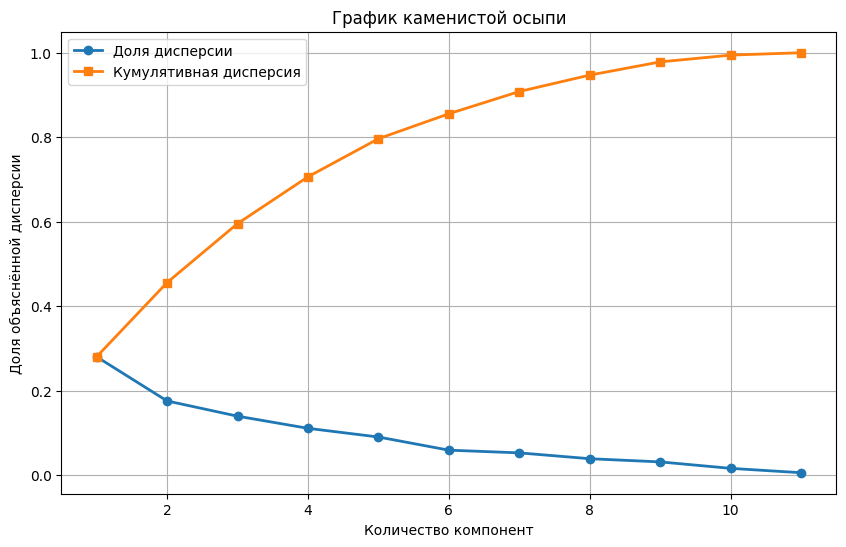

Компонента 1: кумулятивная дисперсия = 0.2802
Компонента 2: кумулятивная дисперсия = 0.4558
Компонента 3: кумулятивная дисперсия = 0.5954
Компонента 4: кумулятивная дисперсия = 0.7062
Компонента 5: кумулятивная дисперсия = 0.7964
Компонента 6: кумулятивная дисперсия = 0.8555
Компонента 7: кумулятивная дисперсия = 0.9082
Компонента 8: кумулятивная дисперсия = 0.9470
Компонента 9: кумулятивная дисперсия = 0.9783
Компонента 10: кумулятивная дисперсия = 0.9943
Компонента 11: кумулятивная дисперсия = 1.0000


In [283]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 'o-', linewidth=2, label='Доля дисперсии')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 's-', linewidth=2, label='Кумулятивная дисперсия')
plt.xlabel('Количество компонент')
plt.ylabel('Доля объяснённой дисперсии')
plt.title('График каменистой осыпи')
plt.legend()
plt.grid(True)
plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(cumulative_variance, 1):
    print(f"Компонента {i}: кумулятивная дисперсия = {var:.4f}")

In [284]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nИспользуем {n_components} компонент, объясняющих {cumulative_variance[n_components-1]:.4f} дисперсии")

pca_reduced = PCA(n_components=n_components)
X_train_pca_red = pca_reduced.fit_transform(X_train_scaled)
X_test_pca_red = pca_reduced.transform(X_test_scaled)

print(f"Размерность до PCA: {X_train.shape[1]}")
print(f"Размерность после PCA: {X_train_pca_red.shape[1]}")


Используем 9 компонент, объясняющих 0.9783 дисперсии
Размерность до PCA: 11
Размерность после PCA: 9


### Построение регрессионных моделей с использованием главных компонентов

In [289]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = lr_pca.predict(X_test_pca)
rmse_lr_pca = np.sqrt(mean_squared_error(y_test, y_pred_lr_pca))
r2_lr_pca = r2_score(y_test, y_pred_lr_pca)
mape_lr_pca = mape(y_test, y_pred_lr_pca)
cv_rmse_lr_pca = np.sqrt(-cross_val_score(lr_pca, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_r2_lr_pca = cross_val_score(lr_pca, X_train_pca, y_train, cv=5, scoring='r2')
rmse_cv_lr_pca = cv_rmse_lr_pca.mean()
r2_cv_lr_pca = cv_r2_lr_pca.mean()

ridge_pca = Ridge(alpha=1.0)
ridge_pca.fit(X_train_pca, y_train)
y_pred_ridge_pca = ridge_pca.predict(X_test_pca)
rmse_ridge_pca = np.sqrt(mean_squared_error(y_test, y_pred_ridge_pca))
r2_ridge_pca = r2_score(y_test, y_pred_ridge_pca)
mape_ridge_pca = mape(y_test, y_pred_ridge_pca)
cv_rmse_ridge_pca = np.sqrt(-cross_val_score(ridge_pca, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_r2_ridge_pca = cross_val_score(ridge_pca, X_train_pca, y_train, cv=5, scoring='r2')
rmse_cv_ridge_pca = cv_rmse_ridge_pca.mean()
r2_cv_ridge_pca = cv_r2_ridge_pca.mean()
results_after_pca = pd.DataFrame({
    'Модель': ['Линейная регрессия (PCA)', 'Гребневая регрессия (PCA)'],
    'RMSE(test)': [rmse_lr_pca, rmse_ridge_pca],
    'R²(test)': [r2_lr_pca, r2_ridge_pca],
    'MAPE(%)(test)': [mape_lr_pca, mape_ridge_pca],
    'RMSE(CV)': [rmse_cv_lr_pca, rmse_cv_ridge_pca],
    'R²(CV)': [r2_cv_lr_pca, r2_cv_ridge_pca]
})

print(results_after_pca.round(4).to_string(index=False))

                   Модель  RMSE(test)  R²(test)  MAPE(%)(test)  RMSE(CV)  R²(CV)
 Линейная регрессия (PCA)      0.6265    0.3994         9.0160    0.6617  0.3225
Гребневая регрессия (PCA)      0.6265    0.3994         9.0164    0.6617  0.3226


In [290]:
comparison = pd.concat([
    results_before_pca.assign(),
    results_after_pca.assign()
], ignore_index=True)

print("\nСравнение моделей до и после PCA:")
print(comparison.round(4).to_string(index=False))


Сравнение моделей до и после PCA:
                   Модель  RMSE(test)  R²(test)  MAPE(%)(test)  RMSE(CV)  R²(CV)
       Линейная регрессия      0.6245    0.4032         8.9911    0.6621  0.3217
      Гребневая регрессия      0.6269    0.3987         9.0247    0.6614  0.3230
 Линейная регрессия (PCA)      0.6265    0.3994         9.0160    0.6617  0.3225
Гребневая регрессия (PCA)      0.6265    0.3994         9.0164    0.6617  0.3226


**Вывод:** PCA уравняла поведение моделей, сделав их предсказания практически идентичными. PCA с 9 компонентами сохранила 97.83% дисперсии — значит, модель не потеряла значимой информации. Ортогональные компоненты устранили мультиколлинеарность, что привело к стабилизации коэффициентов и устранению разницы между линейной и гребневой регрессией. 

Применение PCA с 9 главными компонентами позволило создать более стабильную и устойчивую модель, при сохранении высокой точности предсказания. Хотя линейная регрессия на исходных данных немного точнее на тесте, она более подвержена влиянию мультиколлинеарности. После PCA обе модели стали равнозначны по качеству, а гребневая регрессия — как наиболее устойчивая — остаётся рекомендованной для практического использования.

## 5. Заключение

В ходе работы были исследованы и сравнены линейная и гребневая регрессии для предсказания субъективной оценки качества красного вина на основе его физико-химических свойств. Особое внимание уделено проблеме мультиколлинеарности, подтверждённой крайне высокими значениями VIF (до 1479 для density), вызванной естественными физико-химическими зависимостями между признаками (например, между alcohol, density и pH).

Для устранения мультиколлинеарности и снижения размерности был применён метод главных компонент (PCA). Анализ каменистой осыпи показал, что 9 главных компонент объясняют 97,83% общей дисперсии, что позволяет сохранить почти всю содержательную информацию, при этом полностью устранив корреляции между признаками.

Результаты моделей на PCA-признаках продемонстрировали высокую стабильность: линейная и гребневая регрессии показали практически идентичные метрики, что подтверждает успех устранения мультиколлинеарности. При этом качество предсказаний осталось на высоком уровне: RMSE ≈ 0,626, R² ≈ 0,399, MAPE ≈ 9,02%, что соответствует средней ошибке менее 0,63 балла по шкале качества от 3 до 8 — приемлемый результат для задачи с экспертными оценками.

Таким образом, оптимальным решением стала гребневая регрессия в сочетании с 9 главными компонентами, как наиболее устойчивая, надёжная и обобщающая модель, не страдающая от переобучения и обеспечивающая стабильное качество предсказаний даже при наличии сильных взаимосвязей в исходных данных.

## 6. Список литературы

1. Kaggle: Red Wine Quality Dataset. — URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?spm=a2ty_o01.29997173.0.0.546ac9213TMap4 (дата обращения: 27.11.2025).
2. Scikit-learn: Machine Learning in Python / F. Pedregosa et al. // Journal of Machine Learning Research. — 2011. — Vol. 12. — P. 2825–2830. — URL: https://scikit-learn.org (дата обращения: 27.11.2025).
3. Jolliffe, I. T. Principal Component Analysis. — 2nd ed. — Springer, 2002. — 487 p. — ISBN: 978-0-387-95442-4.
4. Wikipedia: Variance Inflation Factor. — URL: https://en.wikipedia.org/wiki/Variance_inflation_factor (дата обращения: 27.11.2025).
5. NumPy Documentation. — URL: https://numpy.org/doc/ (дата обращения: 27.11.2025).